# Pasado a limpio

In [82]:
import numpy as np
from scipy import signal 

def butterworth_tercios(X, fs):
    # De 100 Hz hasta 8 kHz
    bandas = np.empty(20)
    f_infs = np.empty(20)
    f_sups = np.empty(20)
    w_infs = np.empty(20)
    w_sups = np.empty(20)
    X_filt = np.empty((20, len(X)))

    for i in range(len(bandas)):
        bandas[i] = 2**(i / 3) * 100  # Frecuencias centrales de cada tercio
        f_infs[i] = bandas[i] * 2**(-1 / 6)  # Frecuencias inferiores de cada tercio
        w_infs[i] = f_infs[i] / (0.5 * fs)  # Frecuencias críticas inferiores
        f_sups[i] = bandas[i] * 2**(1 / 6)  # Frecuencias superiores de cada tercio
        w_sups[i] = f_sups[i] / (0.5 * fs)  # Frecuencias críticas superiores

        sos = signal.butter(6, (w_infs[i], w_sups[i]), btype='bandpass', output='sos')
        X_filt[i, :] = signal.sosfilt(sos, X)
        
    return bandas, X_filt

def RMS(X):
    X_RMS = np.sqrt(np.mean(X**2))
    return X_RMS

import soundfile as sf

path_archivos = f'C:/Users/Asus/OneDrive/Escritorio/MapaDeVoces/CalculadoraEspectro/AudiosHolaComoEstas'
archivo = [f'HolaComoEstas{i}' for i in range(56)]
espectros = []

for i in range(56):
    path = f'{path_archivos}/{archivo[i]}.wav'
    audio,fs = sf.read(path)

    bandas,X_filt = butterworth_tercios(audio,fs)
    espectros.append([archivo[i],X_filt])
    # print(espectros[i][0]) #nombre del audio
    # print(espectros[i][1]) #audios filtrados por bandas de 100 a 8k (20 bandas de tercios)

for j in range(56):
    for i in range(20):
        espectros[j][1][i] = RMS(espectros[j][1][i])

LosEspectros = []
for j in range(56):
    nombre = ' '
    nombre = f'{archivo[j]}'
    A = []
    for i in range(20):
        A.append(espectros[j][1][i][0])
    LosEspectros.append([nombre,A])
print(LosEspectros[0][1])
print(LosEspectros[1][1])
print(LosEspectros[2][1])
print(LosEspectros[3][1])

[0.000497325380427148, 0.004647047361385234, 0.02243595069697766, 0.015915372400142267, 0.003487766060218038, 0.009306860026704137, 0.02016589402427091, 0.016678484957078243, 0.025075231193475784, 0.016425615458580404, 0.011706451708225532, 0.006381022100087713, 0.009537045995775262, 0.0028139308427060777, 0.005264816694270004, 0.00400414746636988, 0.005385018585434936, 0.0030737017574001737, 0.0022160482482404924, 0.00081805342425769]
[0.0013327090514592811, 0.005444406365757377, 0.027228389559031813, 0.01810905414871337, 0.004573992035575867, 0.012476035846270023, 0.0228441995749762, 0.025369556421050304, 0.025906951283206407, 0.021683623558341324, 0.016341754423744245, 0.0123104529846858, 0.011538700205310394, 0.004927159918690671, 0.009386865609017598, 0.00770566023491991, 0.008210544241978998, 0.004034472886991924, 0.0027861777518990295, 0.0013841704808294096]
[0.0017233865718197495, 0.0042835763393254045, 0.019429583686513853, 0.01328076260815377, 0.003301359096891101, 0.00988038

In [84]:
print(len(LosEspectros[j][1]))

20


In [81]:
for j in range(56):
    for i in range(len(LosEspectros[j][1])):
        # print(LosEspectros[j][1][i])
        # print(LosEspectros[i][1])
        LosEspectros[j][1][i] = LosEspectros[j][1][i]/max(LosEspectros[i][1])

0.000497325380427148
[0.000497325380427148, 0.004647047361385234, 0.02243595069697766, 0.015915372400142267, 0.003487766060218038, 0.009306860026704137, 0.02016589402427091, 0.016678484957078243, 0.025075231193475784, 0.016425615458580404, 0.011706451708225532, 0.006381022100087713, 0.009537045995775262, 0.0028139308427060777, 0.005264816694270004, 0.00400414746636988, 0.005385018585434936, 0.0030737017574001737, 0.0022160482482404924, 0.00081805342425769]
0.004647047361385234
[0.0013327090514592811, 0.005444406365757377, 0.027228389559031813, 0.01810905414871337, 0.004573992035575867, 0.012476035846270023, 0.0228441995749762, 0.025369556421050304, 0.025906951283206407, 0.021683623558341324, 0.016341754423744245, 0.0123104529846858, 0.011538700205310394, 0.004927159918690671, 0.009386865609017598, 0.00770566023491991, 0.008210544241978998, 0.004034472886991924, 0.0027861777518990295, 0.0013841704808294096]
0.02243595069697766
[0.0017233865718197495, 0.0042835763393254045, 0.01942958368

In [77]:
A = [0.000497325380427148, 0.004647047361385234, 0.02243595069697766, 0.015915372400142267, 0.003487766060218038, 0.009306860026704137, 0.02016589402427091, 0.016678484957078243, 0.025075231193475784, 0.016425615458580404, 0.011706451708225532, 0.006381022100087713, 0.009537045995775262, 0.0028139308427060777, 0.005264816694270004, 0.00400414746636988, 0.005385018585434936, 0.0030737017574001737, 0.0022160482482404924, 0.00081805342425769]
B = [0.0013327090514592811, 0.005444406365757377, 0.027228389559031813, 0.01810905414871337, 0.004573992035575867, 0.012476035846270023, 0.0228441995749762, 0.025369556421050304, 0.025906951283206407, 0.021683623558341324, 0.016341754423744245, 0.0123104529846858, 0.011538700205310394, 0.004927159918690671, 0.009386865609017598, 0.00770566023491991, 0.008210544241978998, 0.004034472886991924, 0.0027861777518990295, 0.0013841704808294096]
C = [0.0017233865718197495, 0.0042835763393254045, 0.019429583686513853, 0.01328076260815377, 0.003301359096891101, 0.009880389575329438, 0.012487046633273623, 0.02077250641249074, 0.015903542515273254, 0.00995375736678382, 0.008870536531702479, 0.007803706157224076, 0.010113621919762972, 0.0033090788886677176, 0.0037749956679726314, 0.004858426879201283, 0.002673031680301836, 0.002450391309998504, 0.002270668917215264, 0.0008003561659716635]
D = [0.0014614623231330606, 0.005943394838097744, 0.020981048051587445, 0.005542230868921705, 0.0032068263278449867, 0.014273451134481882, 0.004106896760310646, 0.012852505211581967, 0.011662002078722247, 0.009438992227163056, 0.0068918904493313685, 0.012036205809500948, 0.005039926176339006, 0.002937770523824964, 0.0030007172742306087, 0.007122366239258632, 0.004517533061223203, 0.0025664610981816997, 0.001961728201323002, 0.0009651599257033302]

# print(max(A))
# print(LosEspectros[0][1])
print(max(B))
print(B[0]/max(B))
print(LosEspectros[1][1])
# print(max(C))
# print(LosEspectros[2][1])
# print(max(D))
# print(LosEspectros[3][1])

0.027228389559031813
0.04894557015830611
[0.0012338994541092317, 0.19995330072510428, 1.3107898015936623, 0.8631148503252783, 0.2166244851009226, 0.6681544920629345, 1.1205553495374574, 1.2033278490163555, 1.113797063315251, 0.8913927563232109, 1.0872424817811106, 0.4796646518489668, 0.4326838745908793, 0.18666443054805115, 0.2407860641142308, 0.3392014598249636, 0.3057028517089871, 0.2704111025009782, 0.11046652386930533, 0.056023810961409036]


# Calculadora de espectro

In [48]:
import soundfile as sf
import numpy as np

path_archivos = f'C:/Users/Asus/OneDrive/Escritorio/MapaDeVoces/CalculadoraEspectro'
# archivo = [f'HolaComoEstas{i}' for i in range(56)]
archivo = f'ooo'
espectros = []
for i in range(56):
    path = f'{path_archivos}/{archivo[i]}.wav'
    audio,fs = sf.read(path)

    espectro_audio = np.fft.fft(audio)
    freq = np.fft.fftfreq(len(audio), d=1/fs)
    espectros.append([espectro_audio,freq])

In [67]:
import soundfile as sf
import numpy as np

path_archivos = f'C:/Users/Asus/OneDrive/Escritorio/MapaDeVoces/CalculadoraEspectro/AudiosE1'
archivo = [f'E{i+1}_crudo' for i in range(27)]
espectros2 = []
for i in range(27):
    path = f'{path_archivos}/{archivo[i]}.wav'
    audio,fs = sf.read(path)

    espectro_audio = np.fft.fft(audio)
    freq = np.fft.fftfreq(len(audio), d=1/fs)
    espectros2.append([espectro_audio,freq])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = espectros[2][0]
freq = espectros[2][1]

# plt.figure()
# plt.plot(freq, np.abs(X))
# plt.title('FFT Magnitude')
# plt.ylabel('Magnitude')
# plt.xlabel('Frequency [Hz]')
# plt.xlim(20, 2000)  # Display only positive frequencies
# plt.show()

In [ ]:
import numpy as np
from scipy import signal

def butterworth_tercios(X, fs):
    # De 500 Hz hasta 16 kHz hay 16 tercios de octava
    bandas = np.empty(20)
    f_infs = np.empty(20)
    f_sups = np.empty(20)
    w_infs = np.empty(20)
    w_sups = np.empty(20)
    X_filt = np.empty((20, len(X)))

    for i in range(len(bandas)):
        bandas[i] = 2**(i / 3) * 100  # Frecuencias centrales de cada tercio
        f_infs[i] = bandas[i] * 2**(-1 / 6)  # Frecuencias inferiores de cada tercio
        w_infs[i] = f_infs[i] / (0.5 * fs)  # Frecuencias críticas inferiores
        f_sups[i] = bandas[i] * 2**(1 / 6)  # Frecuencias superiores de cada tercio
        w_sups[i] = f_sups[i] / (0.5 * fs)  # Frecuencias críticas superiores

        sos = signal.butter(6, (w_infs[i], w_sups[i]), btype='bandpass', output='sos')
        X_filt[i, :] = signal.sosfilt(sos, X)

    # print(f'f_infs: {f_infs}')
    # print(f'f_sups: {f_sups}')
    # print(f'bandas: {bandas}')
    return bandas, X_filt

path_archivos = 'C:/Users/Asus/OneDrive/Escritorio/MapaDeVoces/CalculadoraEspectro/ooo.wav'
audio,fs = sf.read(path_archivos)

bandas,X_filt = butterworth_tercios(audio,fs)

## Debuggeo

In [ ]:
plt.plot(audio)

for i in range(15):
    sf.write(f'X_filt[{i}].wav',X_filt[i],fs)

# Espectros
espectro_audio = np.fft.fft(audio)
espectro_X1 = np.fft.fft(X_filt[1])
espectro_X4 = np.fft.fft(X_filt[4])
espectro_X6 = np.fft.fft(X_filt[6])
espectro_X8 = np.fft.fft(X_filt[8])
espectro_X9 = np.fft.fft(X_filt[9])


freq = np.fft.fftfreq(len(audio), d=1/fs)

plt.plot(freq,espectro_audio)
plt.plot(freq,espectro_X1)
plt.plot(freq,espectro_X4)
plt.plot(freq,espectro_X6)
plt.plot(freq,espectro_X8)
plt.plot(freq,espectro_X9)
plt.xlim([0,1000])
plt.show()

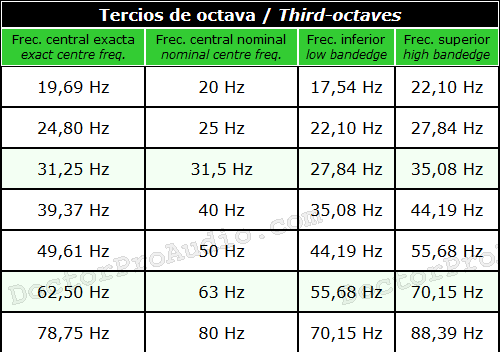

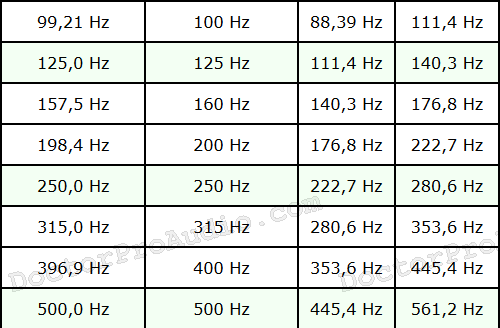

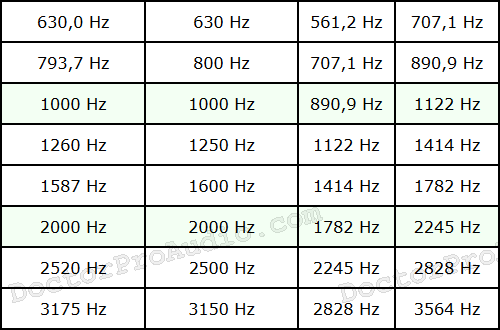

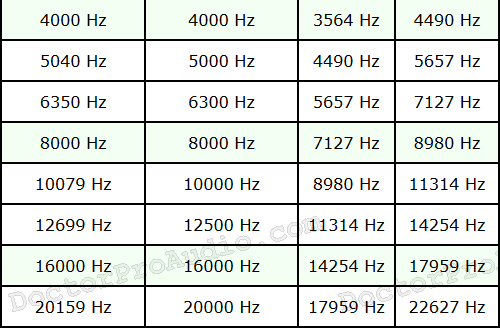